In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv('Algerian_Cleaned.csv')

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
df=df.drop(['day','month','year'],axis=1)

In [25]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [28]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [29]:
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: >

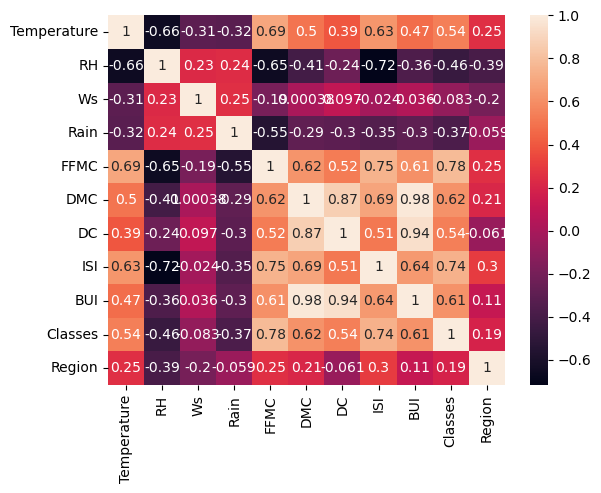

In [37]:
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [42]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold :
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr            

In [43]:
corr_ftrs=correlation(X_train,0.85)

In [44]:
X_train.drop(corr_ftrs,axis=1,inplace=True)
X_test.drop(corr_ftrs,axis=1,inplace=True)

In [47]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.629848,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.717804,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,-0.023558,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.345707,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.750799,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.685656,0.617273,0.212582
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,1.000000,0.742977,0.296441
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.742977,1.000000,0.188837
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,0.296441,0.188837,1.000000


In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [56]:
X_train_sc

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

<Axes: >

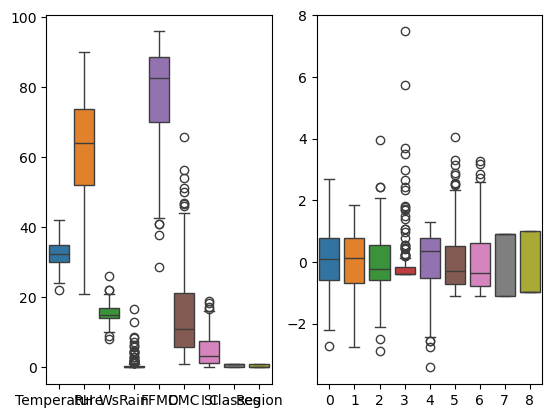

In [58]:
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_sc)

0.6742766873791594
0.9847657384266951
0.5468236465249993


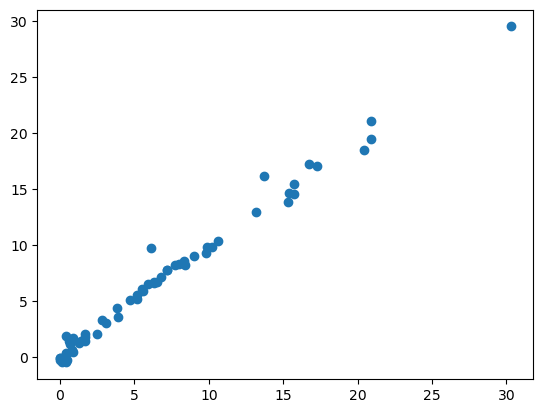

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train_sc,Y_train)
y_pred=regression.predict(X_test_sc)
mae=mean_squared_error(Y_test,y_pred)
mse=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print(mae)
print(score)
print(mse)
plt.scatter(Y_test,y_pred)

2.248345891897475
0.9492020263112388
1.1331759949144085


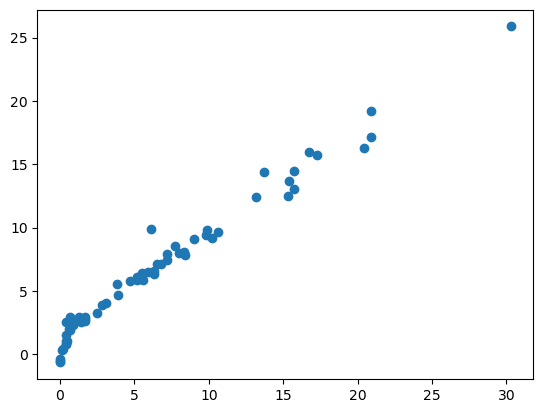

In [60]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lasso=Lasso()
lasso.fit(X_train_sc,Y_train)
y_pred=lasso.predict(X_test_sc)
mae=mean_squared_error(Y_test,y_pred)
mse=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print(mae)
print(score)
print(mse)
plt.scatter(Y_test,y_pred)

0.6949198918152085
0.9842993364555513
0.5642305340105717


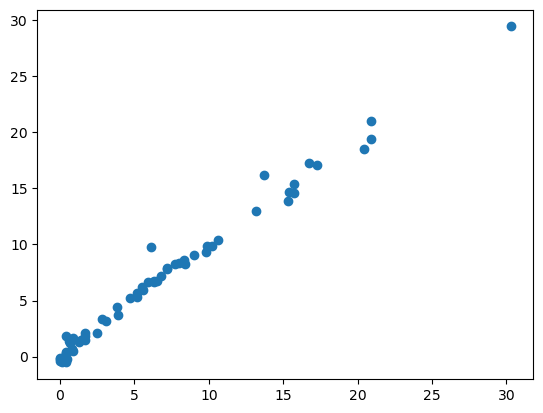

In [61]:
#Ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
Ridge=Ridge()
Ridge.fit(X_train_sc,Y_train)
y_pred=Ridge.predict(X_test_sc)
mae=mean_squared_error(Y_test,y_pred)
mse=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print(mae)
print(score)
print(mse)
plt.scatter(Y_test,y_pred)

In [63]:
scaler

StandardScaler()

In [65]:
Ridge

Ridge()

In [81]:
import pickle
pickle.dump(Ridge,open('Ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

5.517251101025224
0.8753460589519703
1.8822353634896


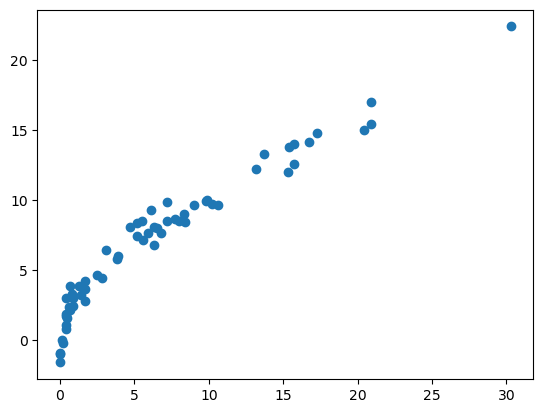

In [67]:
#ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_sc,Y_train)
y_pred=ElasticNet.predict(X_test_sc)
mae=mean_squared_error(Y_test,y_pred)
mse=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print(mae)
print(score)
print(mse)
plt.scatter(Y_test,y_pred)

In [71]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_sc,Y_train)

LassoCV(cv=5)

In [73]:
y_pred=lassocv.predict(X_test_sc)
y_pred
lassocv.alpha_
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

0.9820946715928275


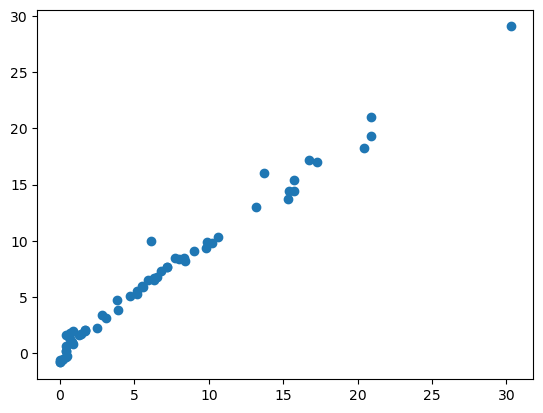

In [76]:
plt.scatter(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print(score)